In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns

In [2]:
adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_CR_NR.h5ad')
adata.obs['category'].value_counts()

category
Effector         22627
Memory           13760
Proliferation     8598
T-MacNK           2259
Name: count, dtype: int64

In [13]:
if 'category_response' not in adata.obs.columns:
    adata.obs['category_response'] = pd.NA
adata.obs.loc[(adata.obs['category'] == 'Effector') & (adata.obs['response'] == 'CR'), 'category_response'] = 'Effector_CR'
adata.obs.loc[(adata.obs['category'] == 'Effector') & (adata.obs['response'] == 'NR'), 'category_response'] = 'Effector_NR'
adata.obs.loc[(adata.obs['category'] == 'Memory') & (adata.obs['response'] == 'CR'), 'category_response'] = 'Memory_CR'
adata.obs.loc[(adata.obs['category'] == 'Memory') & (adata.obs['response'] == 'NR'), 'category_response'] = 'Memory_NR'
adata.obs.loc[(adata.obs['category'] == 'Proliferation') & (adata.obs['response'] == 'CR'), 'category_response'] = 'Proliferation_CR'
adata.obs.loc[(adata.obs['category'] == 'Proliferation') & (adata.obs['response'] == 'NR'), 'category_response'] = 'Proliferation_NR'
adata.obs.loc[(adata.obs['category'] == 'T-MacNK') & (adata.obs['response'] == 'CR'), 'category_response'] = 'T-MacNK_CR'
adata.obs.loc[(adata.obs['category'] == 'T-MacNK') & (adata.obs['response'] == 'NR'), 'category_response'] = 'T-MacNK_NR'

In [14]:
adata.obs['category_response'].value_counts()

category_response
Effector_NR         13221
Effector_CR          9406
Memory_NR            8371
Memory_CR            5389
Proliferation_CR     4308
Proliferation_NR     4290
T-MacNK_NR           1988
T-MacNK_CR            271
Name: count, dtype: int64

In [3]:
adata.obs['category_response'] = adata.obs['category_response'].cat.rename_categories({
    'Proliferation_CR': 'Proliferating_CR',
    'Proliferation_NR': 'Proliferating_NR',
    'T-MacNK_CR': 'Hybrid_CR',
    'T-MacNK_NR': 'Hybrid_NR'
})

In [4]:
adata.obs['category_response'].value_counts()

category_response
Effector_NR         13221
Effector_CR          9406
Memory_NR            8371
Memory_CR            5389
Proliferating_CR     4308
Proliferating_NR     4290
Hybrid_NR            1988
Hybrid_CR             271
Name: count, dtype: int64

In [5]:
adata.write_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_CR_NR.h5ad')

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

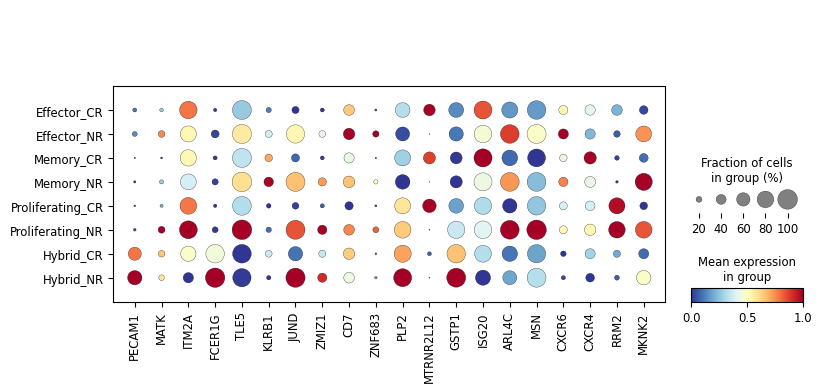

In [5]:
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_CR_NR.h5ad')
adata = adata[adata.obs['cell_type'] == 'CD4'].copy()
new_order = ['Effector_CR', 'Effector_NR', 'Memory_CR', 'Memory_NR', 'Proliferating_CR', 'Proliferating_NR', 'Hybrid_CR', 'Hybrid_NR']
adata.obs['reordered_clusters'] = pd.Categorical(
    adata.obs['category_response'],
    categories= new_order,
    ordered=True
)


all_genes = [
    "PECAM1", "MATK", "ITM2A", "FCER1G", "TLE5", "KLRB1",
    "JUND", "ZMIZ1", "CD7", "ZNF683", "PLP2", "MTRNR2L12",
    "GSTP1", "ISG20", "ARL4C", "MSN", "CXCR6", "CXCR4", "RRM2", "MKNK2"
]

ax = sc.pl.dotplot(
    adata,
    all_genes ,
    cmap='RdYlBu_r',
    standard_scale='var',
    groupby ='reordered_clusters',
    show=False,
    #dendrogram = True,
    #save= 'CART_subtypes_dotplot_combat.png'
)

plt.gcf().set_facecolor('none')  # Set the background color of the figure to none (transparent)
plt.gcf().savefig('/home/emma/result/CART/CD4_CART_dotplot_combat_mlp.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

<Figure size 1200x800 with 0 Axes>

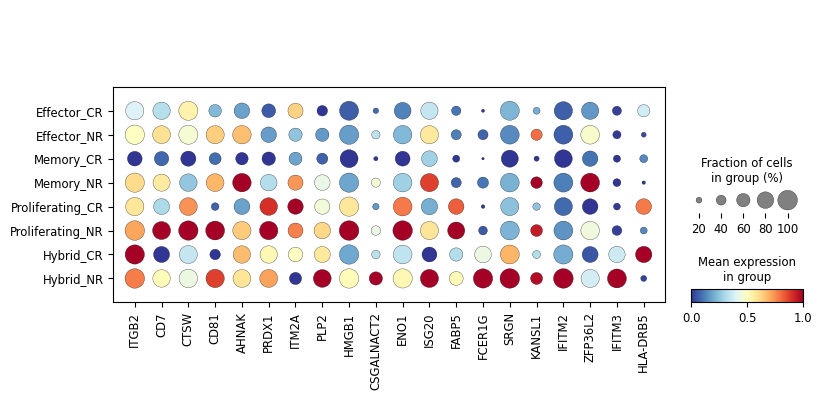

In [4]:
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_CR_NR.h5ad')
adata = adata[adata.obs['cell_type'] == 'CD8'].copy()
new_order = ['Effector_CR', 'Effector_NR', 'Memory_CR', 'Memory_NR', 'Proliferating_CR', 'Proliferating_NR', 'Hybrid_CR', 'Hybrid_NR']
adata.obs['reordered_clusters'] = pd.Categorical(
    adata.obs['category_response'],
    categories= new_order,
    ordered=True
)

all_genes = [
    "ITGB2", "CD7", "CTSW", "CD81", "AHNAK", "PRDX1", "ITM2A",
    "PLP2", "HMGB1", "CSGALNACT2", "ENO1", "ISG20", "FABP5",
    "FCER1G", "SRGN", "KANSL1", "IFITM2", "ZFP36L2", "IFITM3", "HLA-DRB5"
]

plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 10

ax = sc.pl.dotplot(
    adata,
    all_genes ,
    cmap='RdYlBu_r',
    standard_scale='var',
    groupby ='reordered_clusters',
    show=False,
    #dendrogram = True,
    #save= 'CART_subtypes_dotplot_combat.png'
)

plt.gcf().set_facecolor('none')  # Set the background color of the figure to none (transparent)
plt.gcf().savefig('/home/emma/result/CART/CD8_CART_dotplot_combat_mlp.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()